In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
plt.style.use('ggplot')

In [2]:
columns=['user_id','order_dt','order_products','order_amount']
df=pd.read_csv('CDNOW.txt',names=columns,sep='\s+')

In [3]:
df.head()

,user_id,order_dt,order_products,order_amount
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


In [4]:
df.describe()

,user_id,order_dt,order_products,order_amount
count,69659.000000,6.965900e+04,69659.000000,69659.000000
mean,11470.854592,1.997228e+07,2.410040,35.893648
std,6819.904848,3.837735e+03,2.333924,36.281942
min,1.000000,1.997010e+07,1.000000,0.000000
25%,5506.000000,1.997022e+07,1.000000,14.490000
50%,11410.000000,1.997042e+07,2.000000,25.980000
75%,17273.000000,1.997111e+07,3.000000,43.700000
max,23570.000000,1.998063e+07,99.000000,1286.010000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
user_id           69659 non-null int64
order_dt          69659 non-null int64
order_products    69659 non-null int64
order_amount      69659 non-null float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


In [6]:
df['order_date']=pd.to_datetime(df.order_dt,format="%Y%m%d")
#时间的数据类型转换

In [7]:
df['month']=df.order_date.values.astype('datetime64[M]')

In [8]:
df.tail()

,user_id,order_dt,order_products,order_amount,order_date,month
69654,23568,19970405,4,83.74,1997-04-05,1997-04-01
69655,23568,19970422,1,14.99,1997-04-22,1997-04-01
69656,23569,19970325,2,25.74,1997-03-25,1997-03-01
69657,23570,19970325,3,51.12,1997-03-25,1997-03-01
69658,23570,19970326,2,42.96,1997-03-26,1997-03-01


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 6 columns):
user_id           69659 non-null int64
order_dt          69659 non-null int64
order_products    69659 non-null int64
order_amount      69659 non-null float64
order_date        69659 non-null datetime64[ns]
month             69659 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(3)
memory usage: 3.2 MB


In [10]:
#df.date-pd.tseries.offsets.MonthBegin(1)

In [11]:
user_grouped=df.groupby('user_id').sum()
user_grouped.head()
#按用户的维度分析

,order_dt,order_products,order_amount
user_id,,,
1,19970101,1,11.77
2,39940224,6,89.00
3,119833602,16,156.46
4,79882233,7,100.50
5,219686137,29,385.61


In [12]:
user_grouped.describe()

,order_dt,order_products,order_amount
count,2.357000e+04,23570.000000,23570.000000
mean,5.902627e+07,7.122656,106.080426
std,9.460684e+07,16.983531,240.925195
min,1.997010e+07,1.000000,0.000000
25%,1.997021e+07,1.000000,19.970000
50%,1.997032e+07,3.000000,43.395000
75%,5.992125e+07,7.000000,106.475000
max,4.334408e+09,1033.000000,13990.930000


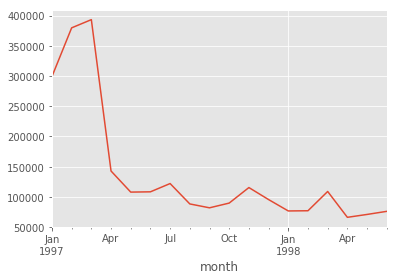

In [13]:
df.groupby('month').order_amount.sum().plot()
#按月的维度分析

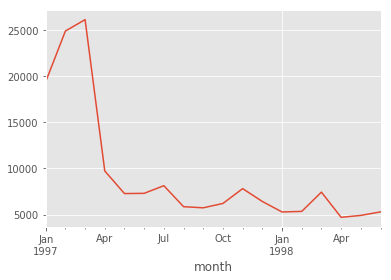

In [14]:
df.groupby('month').order_products.sum().plot()

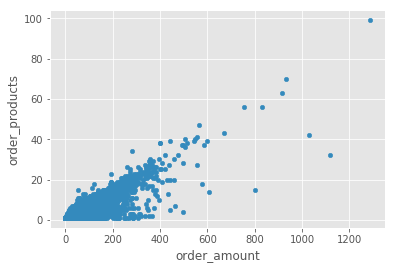

In [15]:
df.plot.scatter(x='order_amount',y='order_products')

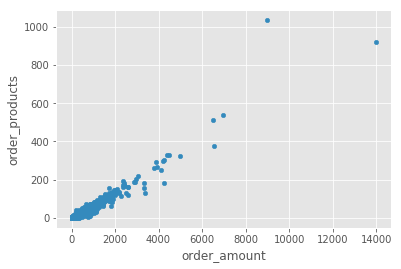

In [16]:
df.groupby('user_id').sum().plot.scatter(x='order_amount',y='order_products')

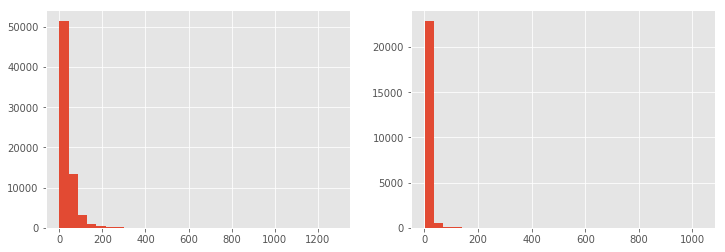

In [17]:
plt.figure(figsize=(12,4))

plt.subplot(121)
df.order_amount.hist(bins=30)

plt.subplot(122)
df.groupby('user_id').sum().order_products.hist(bins=30)

In [18]:
df.groupby('user_id').month.min().value_counts()

1997-02-01    8476
1997-01-01    7846
1997-03-01    7248
Name: month, dtype: int64

In [19]:
df.groupby('user_id').month.max().value_counts()

1997-02-01    4912
1997-03-01    4478
1997-01-01    4192
1998-06-01    1506
1998-05-01    1042
1998-03-01     993
1998-04-01     769
1997-04-01     677
1997-12-01     620
1997-11-01     609
1998-02-01     550
1998-01-01     514
1997-06-01     499
1997-07-01     493
1997-05-01     480
1997-10-01     455
1997-09-01     397
1997-08-01     384
Name: month, dtype: int64

In [20]:
#将用户消费数据进行数据透视
pivoted_counts=df.pivot_table(index='user_id',columns='month',
                             values='order_dt',aggfunc='count').fillna(0)
columns_month=df.month.sort_values().astype('str').unique()
pivoted_counts.columns=columns_month

pivoted_counts.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0


In [21]:
#首先求复购率，复购率的定义是在某时间窗口内消费两次及以上的用户在总消费用户中占比
pivoted_counts_transf=pivoted_counts.applymap(lambda  x:1 if x>1 
                                              else np.NaN if x==0 
                                              else 0)
pivoted_counts_transf.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN


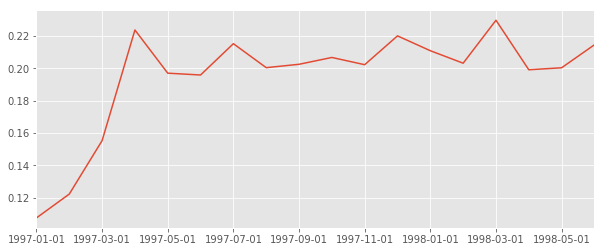

In [22]:
(pivoted_counts_transf.sum()/pivoted_counts_transf.count()).plot(figsize=(10,4))

In [23]:
#接下来计算回购率。回购率是某一个时间窗口内消费的用户，在下一个时间窗口仍旧消费的占比。
pivoted_amount=df.pivot_table(index='user_id',columns='month',
                             values='order_amount',aggfunc='mean').fillna(0)
columns_month=df.month.sort_values().astype('str').unique()
pivoted_amount.columns=columns_month

pivoted_amount.head(5)

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,11.77,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.000,0.000,0.00,0.0,0.0,0.0,0.00,0.0
2,44.50,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.000,0.000,0.00,0.0,0.0,0.0,0.00,0.0
3,20.76,0.0,20.76,19.54,0.00,0.00,0.00,0.00,0.00,0.0,39.205,0.000,0.00,0.0,0.0,0.0,16.99,0.0
4,29.53,0.0,0.00,0.00,0.00,0.00,0.00,14.96,0.00,0.0,0.000,26.480,0.00,0.0,0.0,0.0,0.00,0.0
5,21.65,38.9,0.00,45.55,38.71,26.14,28.14,0.00,40.47,0.0,0.000,43.465,37.47,0.0,0.0,0.0,0.00,0.0


In [24]:
pivoted_purchase=pivoted_amount.applymap(lambda x:1 if x>1
                                        else 0)
pivoted_purchase.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
5,1,1,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0


In [25]:
#再次用applymap+lambda转换数据，只要有过购买，记为1，反之为0
def purchase_return(data):
    status=[]
    for i in range(17):
        if data[i]==1:
            if data[i+1]==1:
                status.append(1)
            if data[i+1]==0:
                status.append(0)
        else:
            status.append(np.NaN)
    status.append(np.NaN)
    return status

pivoted_purchase_return=pivoted_purchase.apply(purchase_return,axis=1)
pivoted_purchase_return.head()

user_id
1    [0, nan, nan, nan, nan, nan, nan, nan, nan, na...
2    [0, nan, nan, nan, nan, nan, nan, nan, nan, na...
3    [0, nan, 1, 0, nan, nan, nan, nan, nan, nan, 0...
4    [0, nan, nan, nan, nan, nan, nan, 0, nan, nan,...
5    [1, 0, nan, 1, 1, 1, 0, nan, 0, nan, nan, 1, 0...
dtype: object

In [27]:
e=(pivoted_purchase_return.sum()/pivoted_purchase_return.count())
e.plot(figsize=(10,4))

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

In [ ]:
#将回购率和复购率综合分析，可以得出，新客的整体质量低于老客，老客的忠诚度（回购率）表现较好，消费频次稍次，这是CDNow网站的用户消费特征。

#接下来进行用户分层，我们按照用户的消费行为，简单划分成几个维度：新用户、活跃用户、不活跃用户、回流用户。


def active_status(data):
    status=[]
    for i in range(18):
        #若本月没有消费
        if data[i]==0:
            if len(status)>0:
                if status[i-1]=='unreg':
                    status.append('unreg')
                else:
                    status.append('unactive')
            else:
                status.append('unreg')
        #若本月消费
        else:
            if len(status)==0:
                status.append('new')
            else:
                if status[i-1]=='unactive':
                    status.append('return')
                elif status[i-1]=='unreg':
                    status.append('new')
                else:
                    status.append('active')
    return status

pivoted_purchase_status=pivoted_purchase.apply(lambda x:active_status(x),axis=1)
pivoted_purchase_status.head()

In [ ]:
purchase_status_counts=pivoted_purchase_status.replace('unreg',np.NaN).apply(lambda x:pd.value_counts(x))
purchase_status_counts

In [ ]:
purchase_status_counts.fillna(0).T.plot.area(figsize=(12,6))

In [ ]:
#用户回流占比在5%～8%，有下降趋势。所谓回流占比，就是回流用户在总用户中的占比
return_rate=purchase_status_counts.apply(lambda x:x/x.sum(),axis=1)
return_rate.loc['return'].plot(figsize=(12,6))

In [ ]:
return_rate.loc['active'].plot(figsize=(12,6))

In [ ]:
user_amount=df.groupby('user_id').order_amount.sum().sort_values().reset_index()
user_amount['amount_cumsum']=user_amount.order_amount.cumsum()
user_amount.tail()

In [ ]:
amount_total=user_amount.amount_cumsum.max()
user_amount['prop']=user_amount.apply(lambda x:x.amount_cumsum/amount_total,axis=1)
user_amount.tail()

In [ ]:
user_amount.prop.plot()

In [ ]:
#接下来计算用户生命周期，这里定义第一次消费至最后一次消费为整个用户生命。
user_purchase=df[['user_id','order_products','order_amount','order_date']]
order_date_min=user_purchase.groupby('user_id').order_date.min()
order_date_max=user_purchase.groupby('user_id').order_date.max()

In [ ]:
(order_date_max-order_date_min).head(10)

In [ ]:
(order_date_max-order_date_min).mean()

In [ ]:
((order_date_max-order_date_min)/np.timedelta64(1,'D')).hist(bins=15)

In [ ]:
#用户生命周期
life_time=(order_date_max-order_date_min).reset_index()
life_time.head()

In [ ]:
life_time['life_time']=life_time.order_date/np.timedelta64(1,'D')
life_time[life_time.life_time>0].life_time.hist(bins=100,figsize=(12,6))

In [ ]:
life_time[life_time.life_time>0].life_time.mean()

In [ ]:
#再来计算留存率，留存率也是消费分析领域的经典应用。它指用户在第一次消费后，有多少比率进行第二次消费。
#和回流率的区别是留存倾向于计算第一次消费，并且有多个时间窗口。
user_purchase_retention=pd.merge(left=user_purchase,right=order_date_min.reset_index(),
                                how='inner',on='user_id',
                                suffixes=('','_min'))
user_purchase_retention.head(5)

In [ ]:
user_purchase_retention['order_date_diff']=user_purchase_retention.order_date - user_purchase_retention.order_date_min

In [ ]:
date_trans=lambda x:x/np.timedelta64(1,'D')
user_purchase_retention['date_diff']=user_purchase_retention.order_date_diff.apply(date_trans)
user_purchase_retention.head(5)

In [ ]:
bin=[0,3,7,15,30,60,90,180,365]
user_purchase_retention['date_diff_bin']=pd.cut(user_purchase_retention.date_diff,bins=bin)
user_purchase_retention.head(5)

In [ ]:
pivoted_retention=user_purchase_retention.pivot_table(index='user_id',columns='date_diff_bin',
                             values='order_amount',aggfunc=sum)
pivoted_retention.head(5)

In [ ]:
pivoted_retention.mean()

In [ ]:
pivoted_retention_trans=pivoted_retention.fillna(0).applymap(lambda x:1 if x>0 else 0)
pivoted_retention_trans.head()

In [ ]:
(pivoted_retention_trans.sum()/pivoted_retention_trans.count()).plot.bar()

In [ ]:
#怎么算放长线掉大鱼呢？我们计算出用户的平均购买周期
grouped=user_purchase_retention.groupby('user_id')
i=0
for user,group in grouped:
    print(group)
    i+=1
    if i==2:
        break

In [ ]:
def diff(group):
    d=group.date_diff - group.date_diff.shift(-1)
    return d

last_diff=user_purchase_retention.groupby('user_id').apply(diff)
last_diff.head(10)

In [ ]:
x=pd.Series([1,2,3,4,5])

In [ ]:
x.shift(-1)

In [ ]:
last_diff.mean()

In [ ]:
last_diff.hist(bins=20)
plt.show()